<a href="https://colab.research.google.com/github/Rohita-G/rohita-gangishetty-700750412/blob/main/ICP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# Add a new hidden layer with 64 units and ReLU activation function
hidden_layer_1 = Dense(64, activation='relu')(input_img)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden_layer_1)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 8s 27ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 2/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 3/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 4/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 5/5
235/235 [==============================] - 3s 14ms/step - loss: 0.6933 - val_loss: 0.6932


In [ ]:
# Make predictions on the test data
decoded_imgs = autoencoder.predict(x_test)
# decoded_imgs now contains the reconstructed test data

313/313 [==============================] - 1s 2ms/step


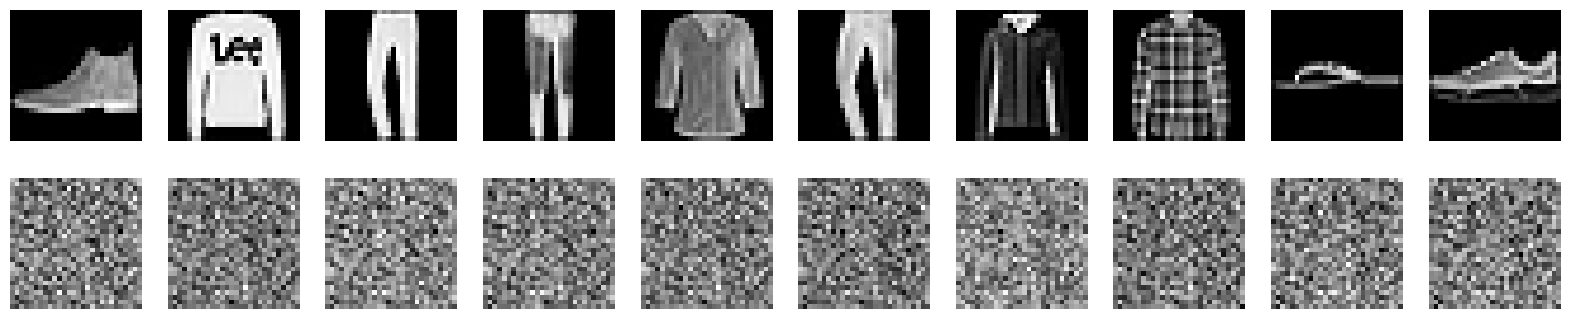

In [ ]:
import matplotlib.pyplot as plt
# Number of digits to display
n = 10
# Create a figure for the plots
plt.figure(figsize=(20, 4))
# Visualize original test data
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
# Visualize reconstructed test data
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6979 - val_loss: 0.6978
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6976 - val_loss: 0.6975
Epoch 3/10
235/235 [==============================] - 4s 15ms/step - loss: 0.6973 - val_loss: 0.6972
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6970 - val_loss: 0.6969
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6967 - val_loss: 0.6967
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6964 - val_loss: 0.6964
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6962 - val_loss: 0.6962
Epoch 8/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6959 - val_loss: 0.6959
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6957 - val_loss: 0.6957
Epoch 10/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6955 - val_lo

In [ ]:
# Make predictions on the noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)
# decoded_imgs now contains the reconstructed test data

313/313 [==============================] - 2s 4ms/step


Epoch 1/5
235/235 [==============================] - 7s 25ms/step - loss: 0.6946 - val_loss: 0.6944
Epoch 2/5
235/235 [==============================] - 5s 21ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 4/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 5/5
235/235 [==============================] - 4s 18ms/step - loss: 0.6938 - val_loss: 0.6937


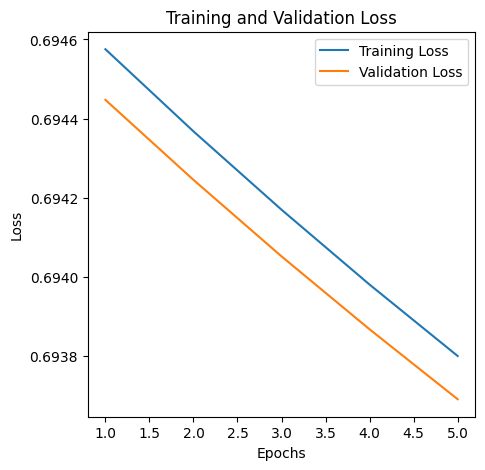

In [8]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# Define the Autoencoder model
encoding_dim = 32
input_img = Input(shape=(784,))
hidden_layer_1 = Dense(64, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_layer_1)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the Autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Access the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training loss and validation loss
plt.figure(figsize=(5, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
